In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_palette("Set2")

In [3]:
import zipfile
data_set_zip = "../data_sets/archive.zip"
data_set_loc = "../data_sets/"
with zipfile.ZipFile(data_set_zip,"r") as zip_ref:
    zip_ref.extractall(data_set_loc)

In [5]:
worldcup_dataset = "../data_sets/WorldCups.csv"
worldcup_players_dataset = "../data_sets/WorldCupPlayers.csv"
worldcup_matches_dataset = "../data_sets/WorldCupMatches.csv"

In [19]:
worldcups = pd.read_csv(worldcup_dataset,parse_dates=["Year"])
worldcups.columns

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')

In [30]:
# look for missing values
worldcups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Year            20 non-null     datetime64[ns]
 1   Country         20 non-null     object        
 2   Winner          20 non-null     object        
 3   Runners-Up      20 non-null     object        
 4   Third           20 non-null     object        
 5   Fourth          20 non-null     object        
 6   GoalsScored     20 non-null     int64         
 7   QualifiedTeams  20 non-null     int64         
 8   MatchesPlayed   20 non-null     int64         
 9   Attendance      20 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 1.7+ KB


In [60]:
# parse attendance
worldcups_a = worldcups.copy()
worldcups_a["Attendance"] = worldcups_a["Attendance"].str.replace(".","",regex = False)
worldcups_a["Attendance"] = worldcups_a["Attendance"].astype("Int64")


In [61]:
worldcups_a.describe()

,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
count,20.000000,20.000000,20.000000,20.0
mean,118.950000,21.250000,41.800000,1872882.35
std,32.972836,7.268352,17.218717,1071842.147758
min,70.000000,13.000000,17.000000,363000.0
25%,89.000000,16.000000,30.500000,874831.5
50%,120.500000,16.000000,38.000000,1734864.0
75%,145.250000,26.000000,55.000000,2725172.75
max,171.000000,32.000000,64.000000,3587538.0


In [69]:
# get some insights about categorical data
worldcups.describe(include = np.object)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13420\2992613110.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  worldcups.describe(include = np.object)


,Country,Winner,Runners-Up,Third,Fourth,Attendance
count,20,20,20,20,20,20
unique,15,9,10,14,16,20
top,Italy,Brazil,Argentina,Germany,Uruguay,590.549
freq,2,5,3,3,3,1


c:\Users\Asus\OneDrive\Desktop\data science\data_science_practice\venv\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Asus\OneDrive\Desktop\data science\data_science_practice\venv\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


<AxesSubplot: xlabel='Attendance', ylabel='Count'>

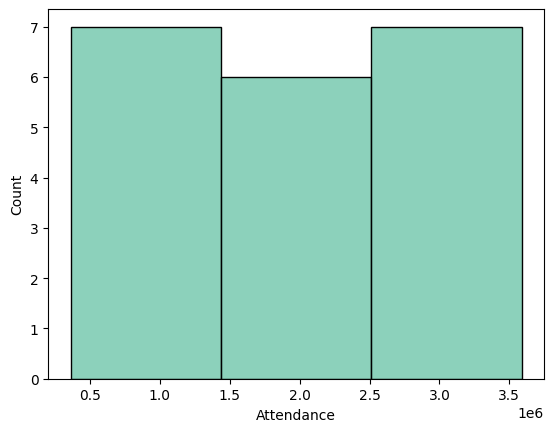

In [70]:

sns.histplot(
    worldcups_a,
    x = "Attendance",
    bins = 3

    )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Uruguay'),
  Text(1, 0, 'Italy'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'Switzerland'),
  Text(5, 0, 'Sweden'),
  Text(6, 0, 'Chile'),
  Text(7, 0, 'England'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Germany'),
  Text(10, 0, 'Argentina'),
  Text(11, 0, 'Spain'),
  Text(12, 0, 'USA'),
  Text(13, 0, 'Korea/Japan'),
  Text(14, 0, 'South Africa')])

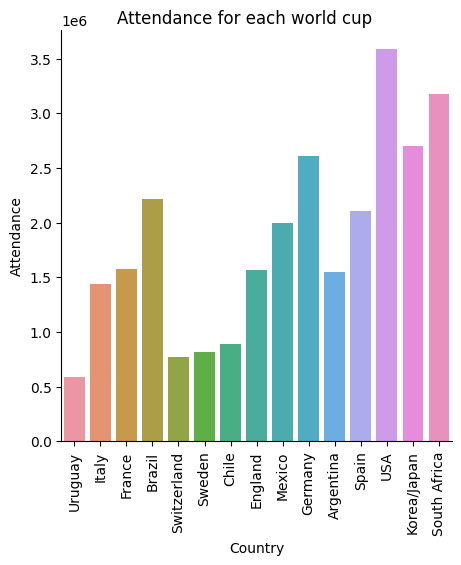

In [96]:
g = sns.catplot(
    data = worldcups_a,
    y = "Attendance",
    x = "Country",
    kind = "bar",
    errorbar = None,

)
g.fig.suptitle("Attendance for each world cup")
plt.xticks(rotation = 90)

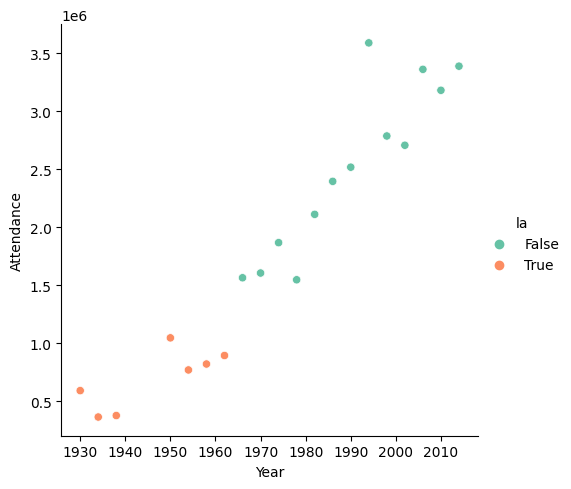

In [94]:
worldcups_a["la"] = worldcups_a["Attendance"] < 1.5e6
sns.relplot(
    data = worldcups_a,
    x = "Year",
    y = "Attendance",
    kind = "scatter",
    hue = "la"
)

In [99]:

worldcups_a.tail(1)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,la
19,2014-01-01,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3386810,False
